In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import arrow as ar
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, COASTLINE, BORDERS, LAND, OCEAN
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from TRMM import TRMM
from ERA import ERA
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
trmm_dict = TRMM.load_dataset(
    [1998, 1999],
    [3],
    aggregation_resolution=0.75,
    timestamp=False,
    invalidate=False,
    bundled=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [116]:
trmm_dict[1998].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
Data columns (total 31 columns):
1998-03-01 00:00:00+00:00    2401 non-null float64
1998-03-02 00:00:00+00:00    2401 non-null float64
1998-03-03 00:00:00+00:00    2401 non-null float64
1998-03-04 00:00:00+00:00    2401 non-null float64
1998-03-05 00:00:00+00:00    2401 non-null float64
1998-03-06 00:00:00+00:00    2401 non-null float64
1998-03-07 00:00:00+00:00    2401 non-null float64
1998-03-08 00:00:00+00:00    2401 non-null float64
1998-03-09 00:00:00+00:00    2401 non-null float64
1998-03-10 00:00:00+00:00    2401 non-null float64
1998-03-11 00:00:00+00:00    2401 non-null float64
1998-03-12 00:00:00+00:00    2401 non-null float64
1998-03-13 00:00:00+00:00    2401 non-null float64
1998-03-14 00:00:00+00:00    2401 non-null float64
1998-03-15 00:00:00+00:00    2401 non-null float64
1998-03-16 00:00:00+00:00    2401 non-null float64
1998-03-17 00:00:00+00:00    2401 non-null float64


In [136]:
def create_cartopy_vis_stock(df, ax=None, filename=None, title=None, cmap='afmhot', clabel=None, vis_type='mesh', no_cbar=False, log_norm=False, interpolation=None, gaussian_filtering=None, values_from='val'):
        """
        Create a cartopy/matplotlib visualization from a passed in coordinate grid dataframe.
        The axes are expected to be named as "lat" and "lon" such that the df can be pivoted appropriately.
        """

        # setup a projection
        if ax is None:
            # setup a figure
            fig = plt.figure(figsize=(10, 10))
            ax = plt.axes(projection=ccrs.PlateCarree())

        # add natural features
        # ax.stock_img()
        # ax.add_feature(COASTLINE)
        # ax.add_feature(LAND)
        ax.add_feature(BORDERS)
        ax.add_feature(OCEAN)
        ax.stock_img()
        ax.coastlines('50m')

        gridded_df = df.pivot(index='lat', columns='lon', values=values_from)

        df_cols = gridded_df.columns
        df_index = gridded_df.index

        # set ticks and labels
        ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
        ax.set_ylabel('Latitude', size=15, labelpad=10)
        ax.set_yticks(df_index[::4])

        ax.set_xticks(df_cols[::4])
        ax.set_xticklabels(df_cols[::4], rotation=90)
        ax.set_xlabel('Longitude', size=15, labelpad=10)

        ax.set_xmargin(0)
        ax.set_ymargin(0)
        ax.autoscale_view()
        
        ax.set_extent((61.125, 97.625, 4.125, 40.625), crs=ccrs.PlateCarree())

        # set a title for the plot if so defined
        if title is not None:
            ttl = ax.set_title(title, size=15)
            ttl.set_position([0.5, 1.02])

        # save the plot into a png if so defined
        if filename is not None:
            plt.savefig(filename, bbox_inches='tight')

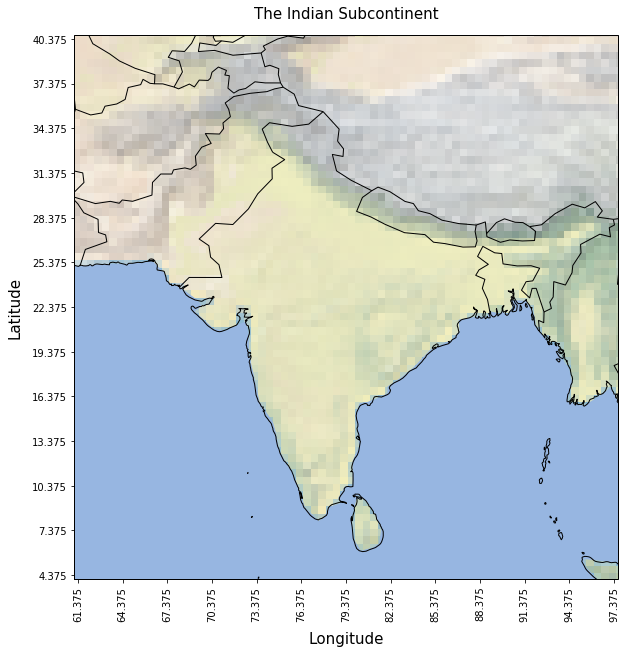

In [140]:
prec_average = Visualization.prepare_cartopy_df(trmm_dict, month=3, day=1)
create_cartopy_vis_stock(prec_average, title='The Indian Subcontinent', filename='output/area_overview.png')